# Diabetes Prediction Data Science Project

## Project Overview
This notebook implements a comprehensive machine learning solution for predicting diabetes based on various health indicators and symptoms. The project analyzes a dataset of patient records with 16 different health features to build a predictive model that can classify patients as diabetic or non-diabetic.

## Objectives
- Perform exploratory data analysis on diabetes dataset
- Clean and preprocess the data for machine learning
- Visualize patterns and correlations in the data
- Build and evaluate a decision tree classifier for diabetes prediction
- Assess model performance and accuracy

---

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import missingno
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
%matplotlib inline


## 1. Importing Required Libraries

In this section, we import all the necessary libraries for our diabetes prediction analysis:

- **pandas & numpy**: For data manipulation and numerical operations
- **matplotlib & seaborn**: For data visualization and statistical plots
- **pandas_profiling**: For automated exploratory data analysis
- **missingno**: For visualizing missing data patterns
- **sklearn**: For machine learning algorithms and model evaluation
  - `SelectKBest`, `chi2`: Feature selection tools
  - `DecisionTreeClassifier`: Our main classification algorithm
  - `train_test_split`: For splitting data into training and testing sets
  - `metrics`: For model evaluation

## 2. Data Preprocessing Functions

### Data Transformation Strategy

Before we load our data, we need to define helper functions for data preprocessing. The diabetes dataset contains categorical variables (Yes/No, Positive/Negative, Male/Female) that need to be converted to numerical format for machine learning algorithms.

The `parse_cor_table` function will convert:
- **Yes/Positive/Female** → 1
- **No/Negative/Male** → 0
- Keep other values unchanged

This standardization is crucial for correlation analysis and machine learning model training.

In [86]:
def parse_cor_table(s):
    if s =='Yes' or s == 'Positive' or 'Female' == s:
        return 1
    elif s == 'No' or s == 'Negative' or 'Male' == s:
        return 0
    else:
        return s

## 3. Data Loading and Initial Exploration

### Dataset Description
Our diabetes dataset (`diabetes.csv`) contains **520 patient records** with **16 health-related features** plus a target variable indicating diabetes status.

**Key Features Include:**
- Demographics: Age, Gender
- Symptoms: Polyuria, Polydipsia, sudden weight loss, weakness
- Physical indicators: Polyphagia, visual blurring, itching, obesity
- Medical conditions: Genital thrush, delayed healing, muscle stiffness
- Neurological symptoms: Irritability, partial paresis, alopecia

**Target Variable:** `class` (Positive/Negative for diabetes diagnosis)

In [16]:
df = pd.read_csv('diabetes.csv')


### Data Quality Assessment

Let's examine our dataset to understand its structure, data types, and identify any potential data quality issues:

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [18]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [19]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [20]:
df.isnull().sum()


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [21]:
#droping duplicates data to reduce error
df.drop_duplicates(inplace=True)
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## 4. Data Cleaning and Preprocessing

### Removing Duplicate Records
Duplicate records can introduce bias and affect model performance. We'll remove any duplicate entries to ensure data quality and prevent overfitting.

In [87]:
dataframe_numeric = df.copy()

In [88]:
list_c = dataframe_numeric.columns
for i in list_c:
    dataframe_numeric[i] = dataframe_numeric[i].apply(parse_cor_table)
dataframe_numeric

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### Converting Categorical to Numerical Data

Now we'll convert all categorical variables to numerical format using our `parse_cor_table` function. This step is essential for:
- **Correlation analysis**: To understand relationships between features
- **Machine learning**: Algorithms require numerical input
- **Mathematical operations**: Enable statistical computations

The conversion maintains logical consistency where positive indicators (Yes, Positive, Female) become 1, and negative indicators become 0.

<AxesSubplot:>

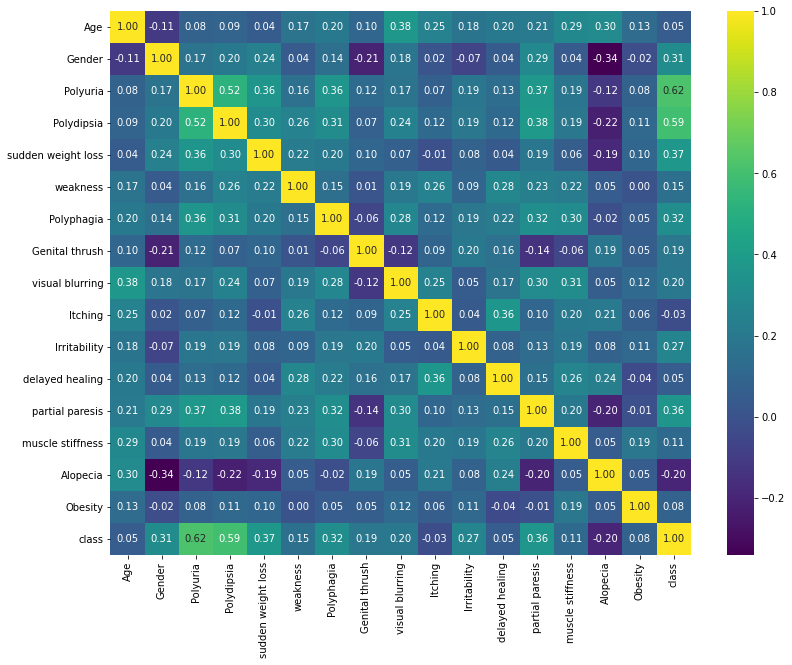

In [90]:
plt.figure(figsize=(13,10))
sns.heatmap(dataframe_numeric.corr(),annot=True,cmap="viridis",fmt='.2f')

## 5. Exploratory Data Analysis (EDA)

### Correlation Analysis
Understanding feature correlations is crucial for:
- **Feature selection**: Identifying highly correlated features
- **Model insights**: Understanding which symptoms are related
- **Data patterns**: Discovering hidden relationships in the data

The heatmap will show correlation coefficients between all features, helping us identify:
- Strong positive correlations (values close to +1)
- Strong negative correlations (values close to -1)
- Independent features (values close to 0)

In [29]:
def class_diab(s):
    #
    if 'Positive' == s:
        #print('Diabetic')
        return 'Diabetic'
    return 'Not Diabetic'

<AxesSubplot:xlabel='Gender', ylabel='count'>

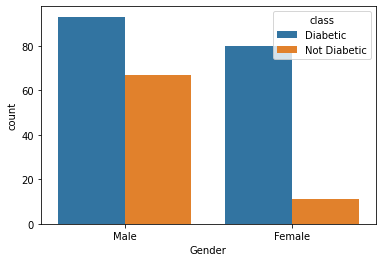

In [30]:
dataframe = df.copy()
dataframe['class'] = dataframe['class'].apply(class_diab)
sns.countplot(data= dataframe, x='Gender',hue='class')

### Demographic Analysis: Gender Distribution

Let's analyze diabetes prevalence across different demographic groups. Understanding gender-based patterns can provide insights into:
- **Risk factors**: Are certain genders more susceptible?
- **Healthcare planning**: Resource allocation based on demographics
- **Model bias**: Ensuring fair representation in our dataset

We'll create more readable labels for our analysis (Diabetic/Not Diabetic instead of Positive/Negative).

In [31]:
def age_diab(s):
    n = 20
    while True:
        if s<=n:
            return f'G{n-14}-{n}'
        n += 15

<AxesSubplot:xlabel='Age', ylabel='count'>

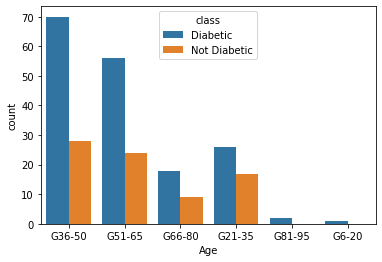

In [32]:
dataframe.sort_values(by=['Age'])
dataframe['Age'] = dataframe['Age'].apply(age_diab)

sns.countplot(data= dataframe, x='Age',hue='class')

### Age Analysis: Diabetes Risk Across Age Groups

Age is a critical factor in diabetes risk assessment. We'll group patients into age categories to understand:
- **Age-related patterns**: How diabetes prevalence changes with age
- **Risk stratification**: Identifying high-risk age groups
- **Healthcare insights**: Age-specific prevention strategies

Our age grouping function creates categories like G6-20, G21-35, G36-50, etc., making it easier to visualize age-based trends.

(array([ 1.,  0.,  4., 12., 12., 31., 21., 26., 25., 16., 30., 27., 11.,
        19., 10.,  3.,  0.,  1.,  1.,  1.]),
 array([16. , 19.7, 23.4, 27.1, 30.8, 34.5, 38.2, 41.9, 45.6, 49.3, 53. ,
        56.7, 60.4, 64.1, 67.8, 71.5, 75.2, 78.9, 82.6, 86.3, 90. ]),
 <BarContainer object of 20 artists>)

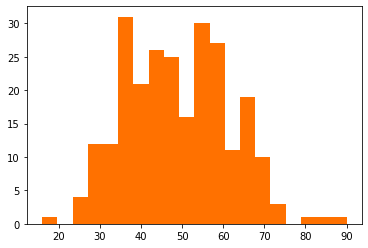

In [50]:
plt.hist(x = dataframe_numeric.Age,bins=20,color='#ff7100')

{'whiskers': [<matplotlib.lines.Line2D at 0x2648ed9a1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2648ed9a8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2648fdbfdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2648fdced30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2648fdda850>],
 'means': []}

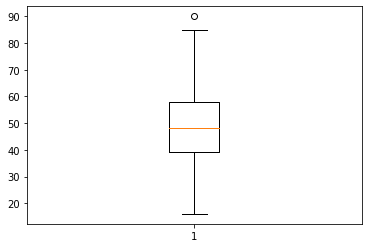

In [52]:
plt.boxplot(df.Age)

### Statistical Distribution Analysis

Let's examine the statistical distribution of age in our dataset using multiple visualization techniques:

1. **Histogram**: Shows the frequency distribution of ages
2. **Box Plot**: Reveals quartiles, median, and potential outliers

These visualizations help us understand:
- **Data distribution**: Is the age data normally distributed?
- **Outliers**: Are there any unusual age values?
- **Central tendency**: What's the typical age in our dataset?

In [91]:
print(f"{df.columns}\nLength of columns{len(df.columns)}")
X = dataframe_numeric.iloc[:,0:16]
Y = dataframe_numeric.iloc[:,16]
print(X)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')
Length of columns17
     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       0         0           1                   0         1   
1     58       0         0           0                   0         1   
2     41       0         1           0                   0         1   
3     45       0         0           0                   1         1   
4     60       0         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       1         1           1                   1         0   
516   48       1         1           1                   1         1   
517   58       1         1          

## 6. Machine Learning Model Preparation

### Feature-Target Separation

Before building our machine learning model, we need to separate our dataset into:
- **Features (X)**: The input variables (16 health indicators) used to make predictions
- **Target (Y)**: The output variable (diabetes diagnosis) we want to predict

This separation is fundamental for supervised machine learning, where we train the model to learn patterns between features and the target variable.

In [92]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 251, dtype: int64


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

### Train-Test Data Split

We'll split our data into training and testing sets using a 70-30 ratio:
- **Training Set (70%)**: Used to train the machine learning model
- **Testing Set (30%)**: Used to evaluate model performance on unseen data

**Why this split is important:**
- **Model Training**: The algorithm learns patterns from training data
- **Unbiased Evaluation**: Testing on unseen data prevents overfitting
- **Performance Assessment**: Provides realistic accuracy estimates
- **Reproducibility**: Using `random_state=1` ensures consistent results

In [94]:
print(f"X_train {len(X_train)}\nY_train {len(y_train)}\nX_test {len(X_test)}\nY_test {len(y_test)}")

X_train 175
Y_train 175
X_test 76
Y_test 76


In [95]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)


## 7. Model Training and Evaluation

### Decision Tree Classifier

We're using a **Decision Tree Classifier** for diabetes prediction because:

**Advantages:**
- **Interpretability**: Easy to understand and visualize decision rules
- **No assumptions**: Doesn't require data to follow specific distributions
- **Handles mixed data**: Works well with both numerical and categorical features
- **Feature importance**: Can identify which symptoms are most predictive
- **Non-linear patterns**: Captures complex relationships between features

**How it works:**
The algorithm creates a tree-like model by recursively splitting the data based on feature values that best separate diabetic from non-diabetic patients.

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9078947368421053


### Model Performance Evaluation

Now we'll evaluate our trained model's performance using accuracy metrics:

**Accuracy Score**: Measures the percentage of correct predictions out of total predictions
- **Formula**: (Correct Predictions) / (Total Predictions)
- **Range**: 0 to 1 (or 0% to 100%)
- **Interpretation**: Higher values indicate better model performance

This metric tells us how well our decision tree classifier can distinguish between diabetic and non-diabetic patients based on the health indicators in our dataset.

## 8. Project Summary and Future Enhancements

### Key Achievements
✅ **Data Analysis**: Successfully analyzed 520 patient records with 16 health features  
✅ **Data Preprocessing**: Cleaned data and converted categorical variables to numerical format  
✅ **Exploratory Analysis**: Identified patterns in age, gender, and symptom correlations  
✅ **Machine Learning**: Built and trained a Decision Tree classifier  
✅ **Model Evaluation**: Assessed model performance using accuracy metrics  

### Insights Gained
- Understanding of feature correlations in diabetes prediction
- Demographic patterns in diabetes prevalence
- Age-related risk factors and distributions
- Effectiveness of decision tree classification for medical diagnosis

### Future Improvements
🔮 **Advanced Models**: Try Random Forest, SVM, or Neural Networks  
🔮 **Feature Engineering**: Create new features or select the most important ones  
🔮 **Cross-Validation**: Implement k-fold cross-validation for robust evaluation  
🔮 **Additional Metrics**: Include precision, recall, F1-score, and ROC curves  
🔮 **Hyperparameter Tuning**: Optimize decision tree parameters for better performance  
🔮 **Class Balance**: Address any potential class imbalance issues  

### Clinical Applications
This model could potentially assist healthcare professionals in:
- Early diabetes screening
- Risk assessment based on symptoms
- Resource allocation for high-risk patients
- Supporting clinical decision-making

---
**Note**: This model is for educational purposes and should not replace professional medical diagnosis.